In [49]:
!pip3 install catboost

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *

In [51]:
test_df=pd.read_csv('/content/Test_Data.csv')
train_df=pd.read_csv('/content/Train_Data.csv')

In [52]:
train_df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,DX6,58,25.515286,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,21001,39,11500,DX6,16,27.094959,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,4263,44,2796,DX1,8,28.602921,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,11208,52,12190,DX1,52,21.909832,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

In [54]:
train_df.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [55]:
test_df.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                3
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  262
Physical activity            262
Regular sleeping hours       262
Alcohol consumption          262
Social interaction           262
Taking supplements           262
Mental health management     262
Illness count last year      262
dtype: int64

<Axes: >

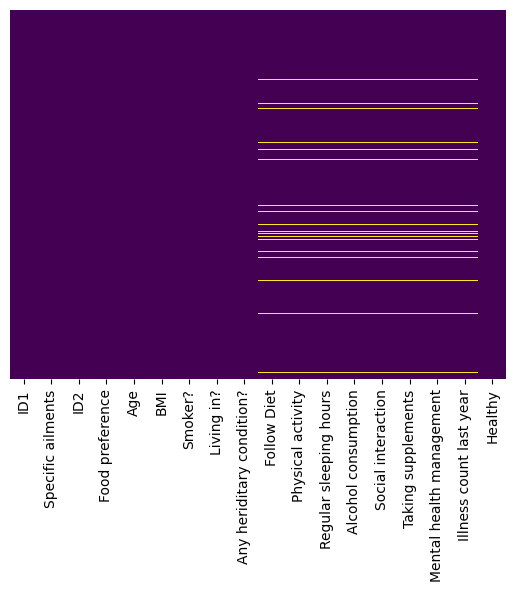

In [56]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
train_df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,DX6,58,25.515286,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,21001,39,11500,DX6,16,27.094959,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,4263,44,2796,DX1,8,28.602921,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,11208,52,12190,DX1,52,21.909832,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [58]:
train_df['ID1'].unique

<bound method Series.unique of 0         2408
1        25063
2        26798
3        31907
4        26412
         ...  
25915       69
25916    21001
25917     4263
25918    11208
25919    21535
Name: ID1, Length: 25920, dtype: int64>

In [59]:
train_df['ID2'].unique

<bound method Series.unique of 0         2668
1        10363
2          132
3        10499
4         7963
         ...  
25915      818
25916    11500
25917     2796
25918    12190
25919     8324
Name: ID2, Length: 25920, dtype: int64>

In [60]:
train_df.drop(['ID1','ID2'],axis=1,inplace=True)
test_df.drop(['ID1','ID2'],axis=1,inplace=True)


In [61]:
train_df

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,44,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,39,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,29,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,27,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,9,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,DX6,58,25.515286,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,39,DX6,16,27.094959,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,44,DX1,8,28.602921,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,52,DX1,52,21.909832,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [62]:
train_df["Food preference"] = LabelEncoder().fit_transform(train_df["Food preference"])
train_df["Smoker?"] = LabelEncoder().fit_transform(train_df["Smoker?"])
train_df["Living in?"] = LabelEncoder().fit_transform(train_df["Living in?"])
train_df["Any heriditary condition?"] = LabelEncoder().fit_transform(train_df["Any heriditary condition?"])

In [63]:
test_df["Food preference"] = LabelEncoder().fit_transform(test_df["Food preference"])
test_df["Smoker?"] = LabelEncoder().fit_transform(test_df["Smoker?"])
test_df["Living in?"] = LabelEncoder().fit_transform(test_df["Living in?"])
test_df["Any heriditary condition?"] = LabelEncoder().fit_transform(test_df["Any heriditary condition?"])

In [64]:
train_df

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,44,31,49,20.500470,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,39,25,20,26.076580,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,29,31,1,21.420866,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,27,0,30,25.203247,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,9,31,40,19.355846,2,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,31,58,25.515286,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,39,31,16,27.094959,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,44,0,8,28.602921,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,52,0,52,21.909832,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [65]:
train_df['Healthy'].value_counts()

1    16300
0     9620
Name: Healthy, dtype: int64

In [66]:
train_df.interpolate(method ='linear', limit_direction ='forward', inplace=True)
test_df.interpolate(method ='linear', limit_direction ='forward', inplace=True)


In [67]:
X=train_df.drop(columns="Healthy", axis=1)
Y=train_df["Healthy"]

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, Y, test_size=0.2, random_state=42)

In [70]:
smote = SMOTE(random_state = 14)
X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

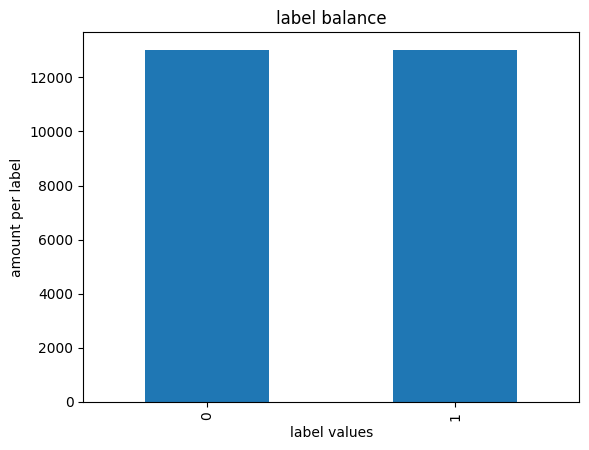

In [71]:
y_train_3.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [72]:
xgbc=XGBClassifier(random_state=14)
cb=CatBoostClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
kn=KNeighborsClassifier()

In [73]:

def classification(X_tr,y_tr,X_te,y_te,method):

    method.fit(X_tr,y_tr)
    p_train = method.predict(X_tr)
    p_test = method.predict(X_te)

    print('train f1 score')
    print(f1_score(y_tr, p_train ,average='micro'))
    print('test f1 score')
    print(f1_score(y_te, p_test ,average='micro'))
    print('-'*20)

    plt.figure(figsize=(15,6))
    sns.heatmap(confusion_matrix(y_te,p_test),annot=True)
    plt.tight_layout()
    plt.show()

train f1 score
0.9153544819110531
test f1 score
0.8335262345679012
--------------------


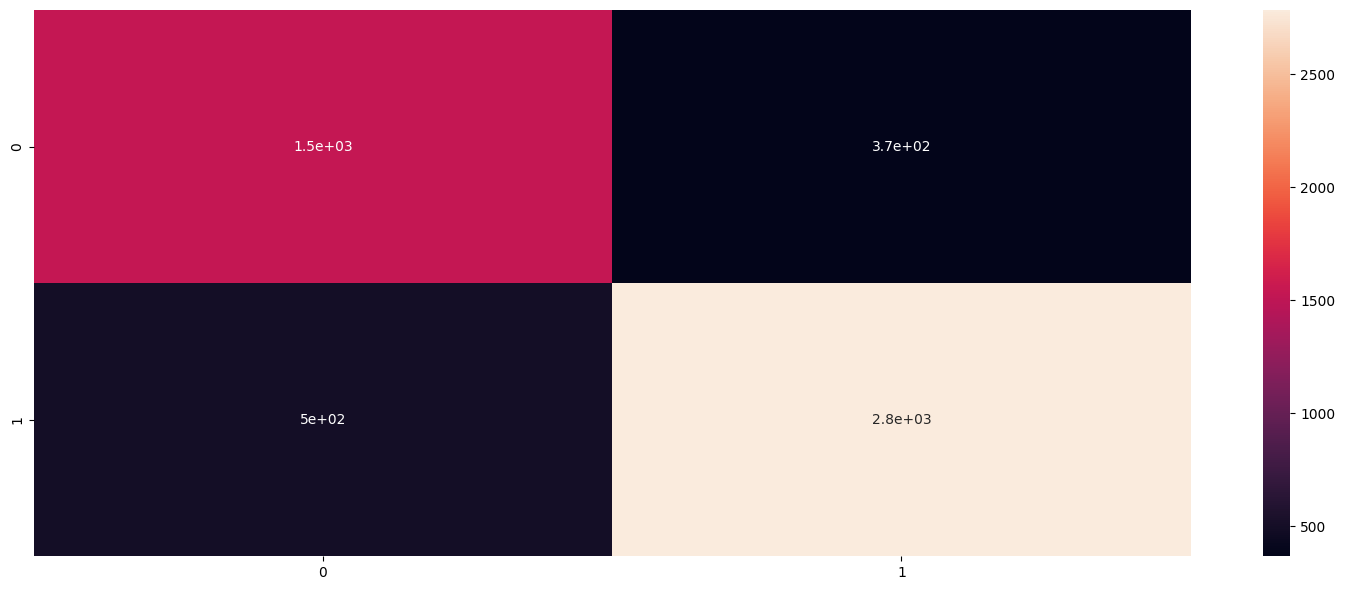

In [74]:
classification(X_train_3,y_train_3,X_test,y_test,xgbc)

train f1 score
0.999385513480298
test f1 score
0.8194444444444444
--------------------


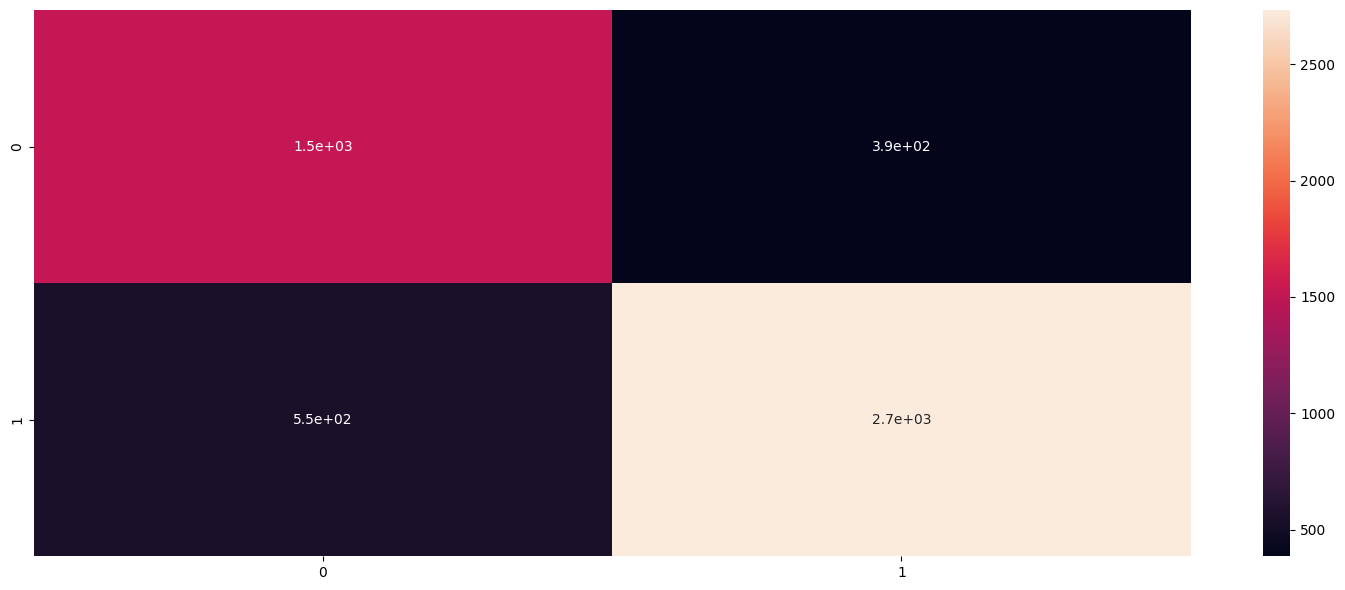

In [75]:
#classification(X_train_3,y_train_3,X_test,y_test,rfc)

Learning rate set to 0.041438
0:	learn: 0.6753919	total: 6.69ms	remaining: 6.68s
1:	learn: 0.6614965	total: 12.4ms	remaining: 6.21s
2:	learn: 0.6436987	total: 18.3ms	remaining: 6.09s
3:	learn: 0.6284724	total: 24ms	remaining: 5.97s
4:	learn: 0.6139366	total: 30ms	remaining: 5.97s
5:	learn: 0.6016995	total: 35.9ms	remaining: 5.95s
6:	learn: 0.5905082	total: 41.8ms	remaining: 5.93s
7:	learn: 0.5813387	total: 47.6ms	remaining: 5.9s
8:	learn: 0.5727076	total: 53.7ms	remaining: 5.92s
9:	learn: 0.5651969	total: 59.7ms	remaining: 5.91s
10:	learn: 0.5581266	total: 65.4ms	remaining: 5.88s
11:	learn: 0.5501106	total: 71.4ms	remaining: 5.88s
12:	learn: 0.5443552	total: 77.4ms	remaining: 5.87s
13:	learn: 0.5388016	total: 83.3ms	remaining: 5.87s
14:	learn: 0.5317915	total: 89.2ms	remaining: 5.86s
15:	learn: 0.5269768	total: 95ms	remaining: 5.84s
16:	learn: 0.5208279	total: 101ms	remaining: 5.84s
17:	learn: 0.5162387	total: 107ms	remaining: 5.83s
18:	learn: 0.5119852	total: 118ms	remaining: 6.1s
19:

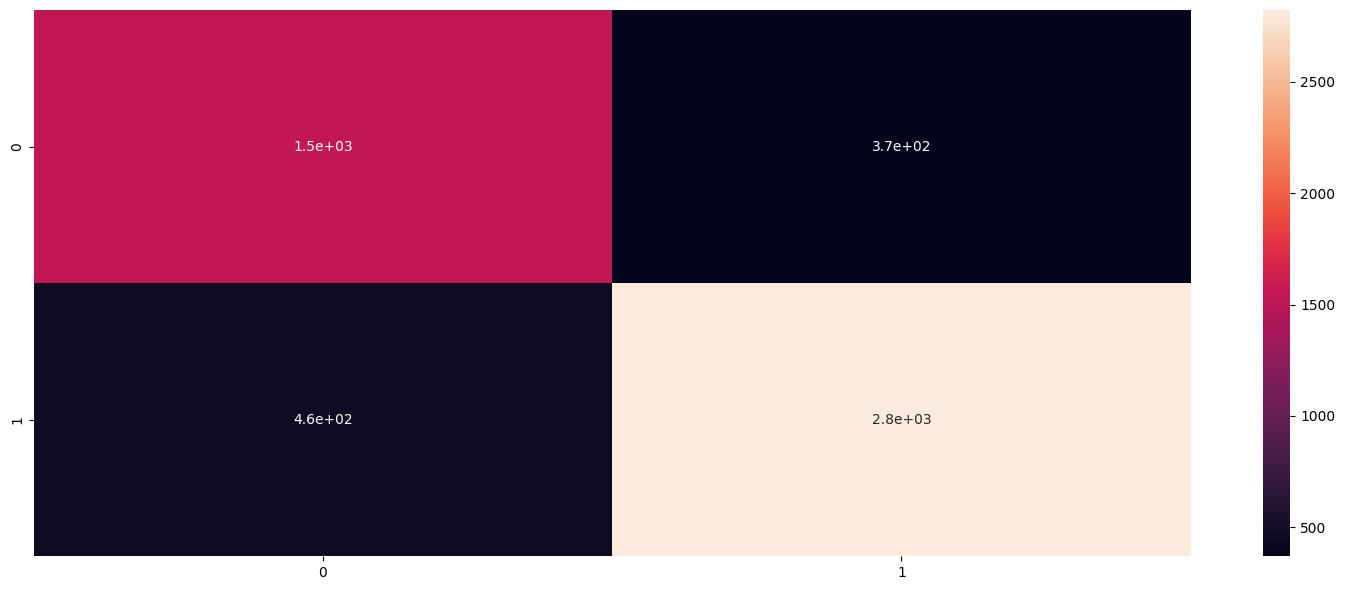

In [76]:
#classification(X_train_3,y_train_3,X_test,y_test,cb)

train f1 score
0.999385513480298
test f1 score
0.7671682098765432
--------------------


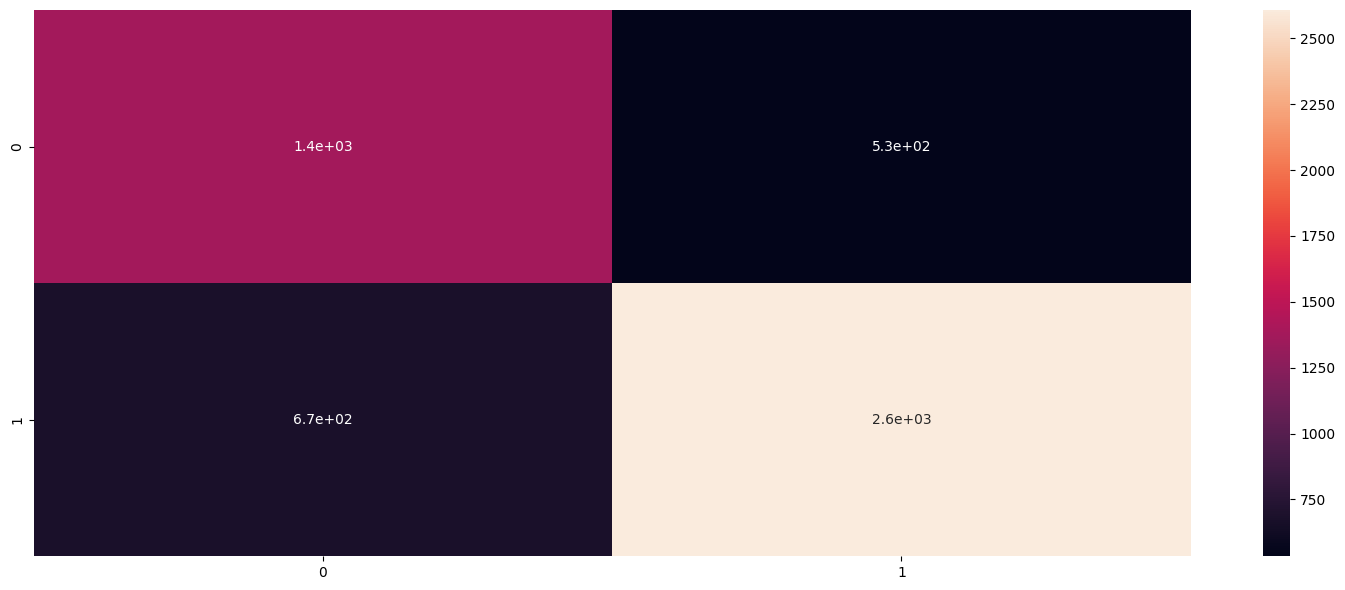

In [77]:
#classification(X_train_3,y_train_3,X_test,y_test,dtc)

train f1 score
0.999385513480298
test f1 score
0.785108024691358
--------------------


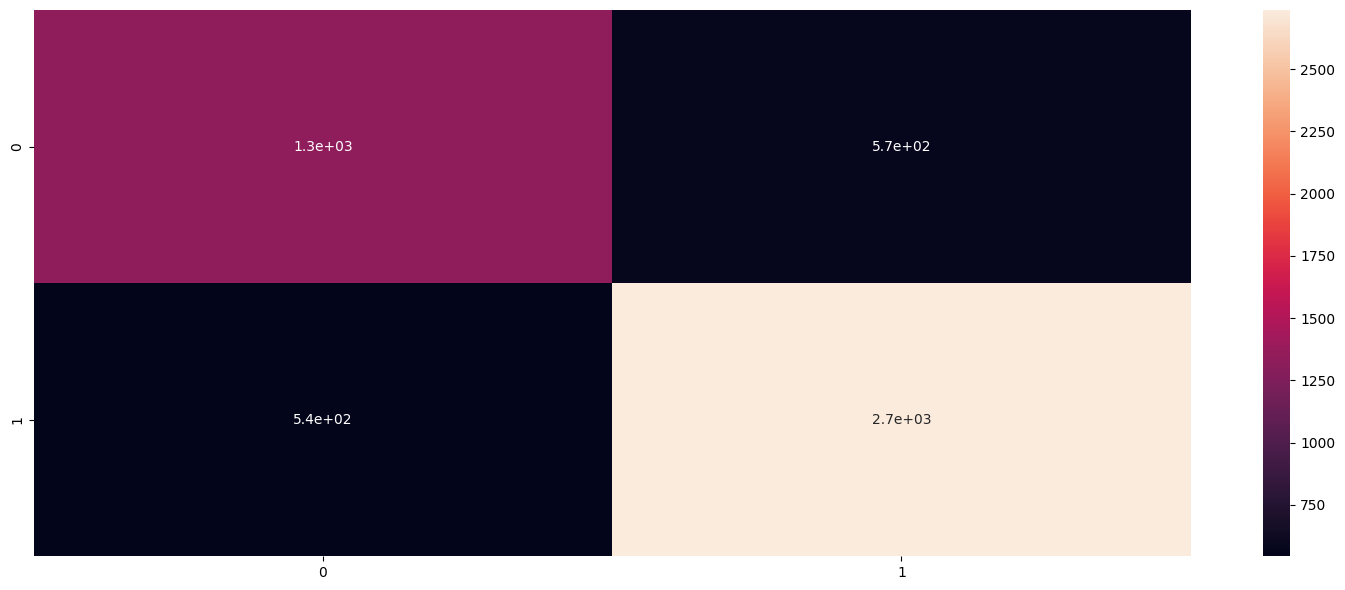

In [78]:
#classification(X_train_3,y_train_3,X_test,y_test,etc)

train f1 score
0.8322835855288424
test f1 score
0.8188657407407407
--------------------


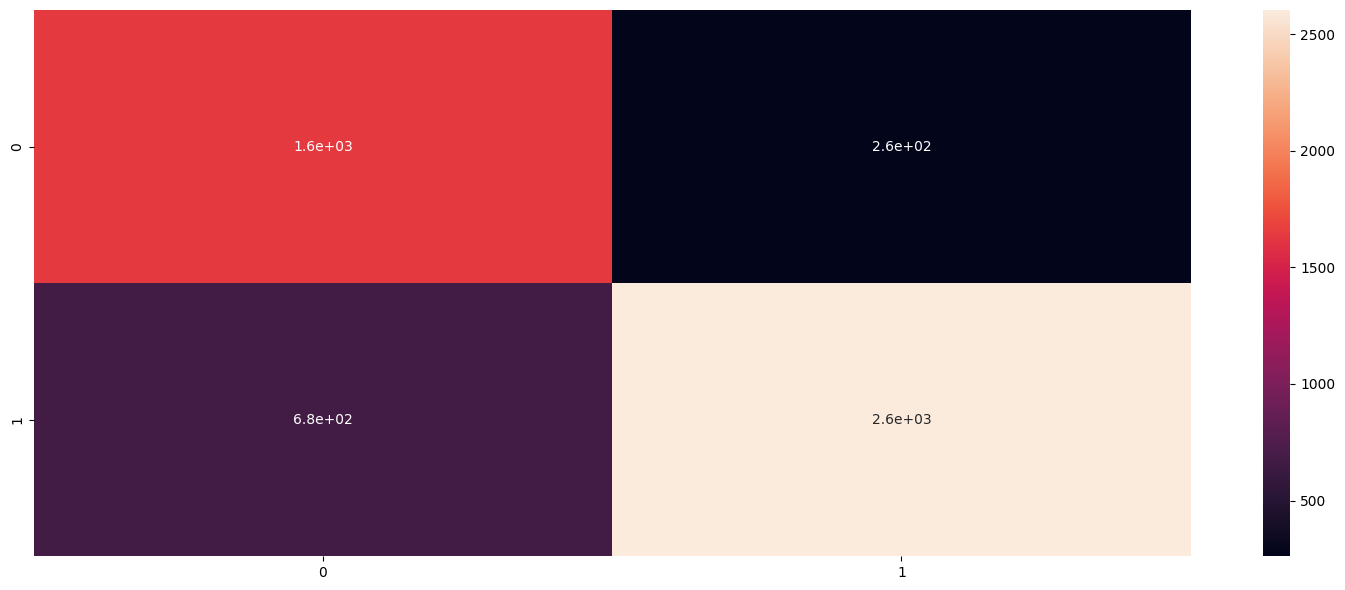

In [79]:
#classification(X_train_3,y_train_3,X_test,y_test,gbc)

train f1 score
0.8527152623089331
test f1 score
0.7256944444444444
--------------------


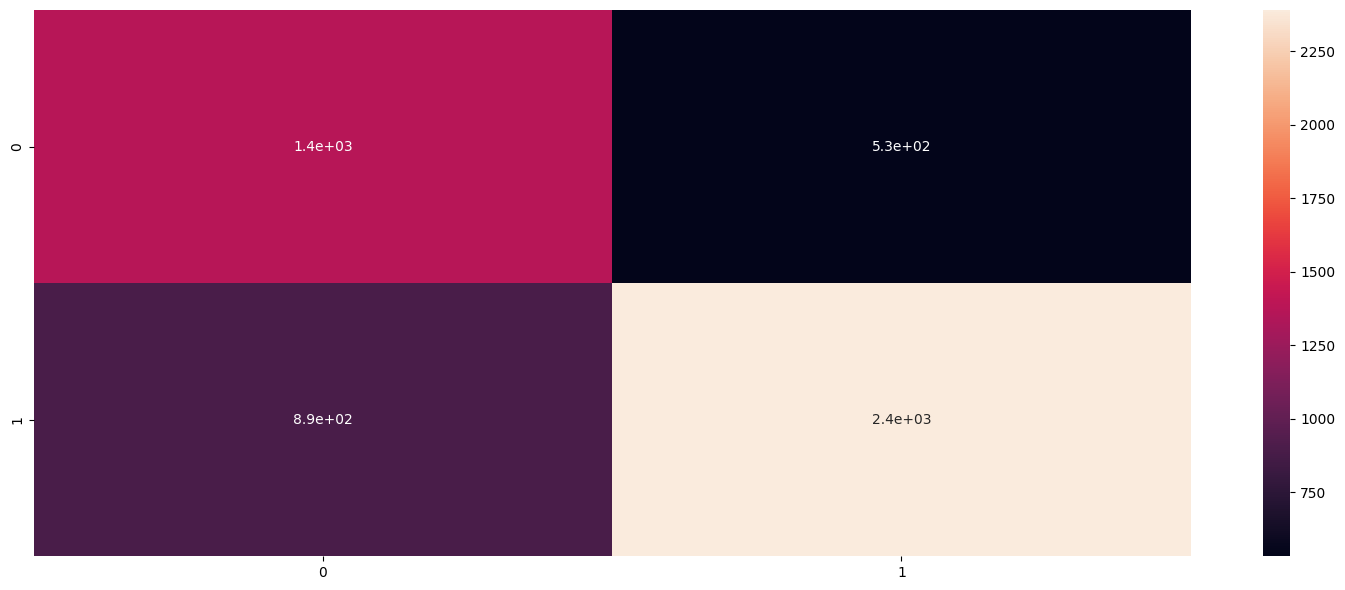

In [80]:
#classification(X_train_3,y_train_3,X_test,y_test,kn)

In [81]:
test_df

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,2,31,38,18.879331,2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,0,46,21.231991,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,37,28,11,17.867876,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44,30,10,26.886096,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,37,25,3,23.362746,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,21,24,27,28.880884,1,1,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6476,27,24,8,20.358229,1,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
6477,39,31,29,27.365294,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6478,29,30,65,22.546412,2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
test_df.isnull().sum()

Specific ailments            0
Food preference              0
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Any heriditary condition?    0
Follow Diet                  0
Physical activity            0
Regular sleeping hours       0
Alcohol consumption          0
Social interaction           0
Taking supplements           0
Mental health management     0
Illness count last year      0
dtype: int64

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test = sc.fit_transform(test_df)

In [84]:
prediction=xgbc.predict(test)

In [85]:
prediction

array([0, 1, 0, ..., 1, 0, 0])

In [93]:
sample_df = pd.read_csv('/content/Sample_Submission (1).csv')
sample_df

,predictions
0,1
1,1
2,1
3,0
4,0
...,...
6475,1
6476,0
6477,1
6478,0


In [94]:
sample_df['predictions'] = prediction
sample_df['predictions'] = sample_df['predictions'].astype(int)
sample_df

,predictions
0,0
1,1
2,0
3,0
4,0
...,...
6475,0
6476,0
6477,1
6478,0


In [95]:
sample_df.to_csv('Aryansh_summer_analytics.csv',index=False)

In [96]:
from google.colab import files
files.download('Aryansh_summer_analytics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>